#Boltzmann Machine

Deep Restricted Bolztman structure example 

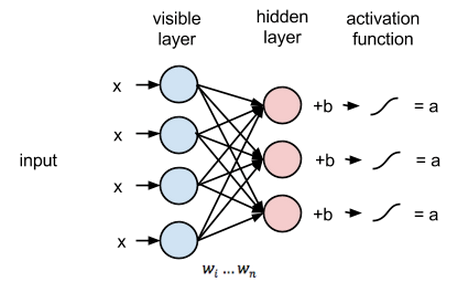

##Downloading the dataset

###ML-100K

In [2]:
!wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip ml-100k.zip
!ls

--2020-12-19 18:25:32--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  16.0MB/s    in 0.3s    

2020-12-19 18:25:33 (16.0 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

###ML-1M

In [3]:
!wget "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
!unzip ml-1m.zip
!ls

--2020-12-19 18:25:33--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  19.2MB/s    in 0.3s    

2020-12-19 18:25:33 (19.2 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
ml-100k  ml-100k.zip  ml-1m  ml-1m.zip	sample_data


##Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

## Importing the dataset


In [5]:
# We won't be using this dataset.
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
                                                                        #"::": in the file, the movie name are seperate bt their ratings and other features
                                                                        #None: because the file doesnt have a header
                                                                        #engine: to ensure the data is inout correctly 
                                                                        #'latin-1': because of some special character in the movie title   
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

In [6]:
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [7]:
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [8]:
ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


## Preparing the training set and the test set


In [9]:
training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t')         
                                                                        #'\t': seperator is a tab 
                                                                        # We have 80k ratings 
training_set = np.array(training_set, dtype = 'int')              
                                                                        #Turning this training set into an array, specify the data type as well(int) 
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t')
test_set = np.array(test_set, dtype = 'int')

In [10]:
training_set
            #User, movies, rating, timestamp 

array([[        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119],
       ...,
       [      943,      1188,         3, 888640250],
       [      943,      1228,         3, 888640275],
       [      943,      1330,         3, 888692465]])

## Getting the number of users and movies


In [11]:
nb_users = int(max(max(training_set[:, 0], ), max(test_set[:, 0])))
                                                                        #We put in this way instead of the actual number in order to accommodate other files as well
                                                                        #we get the maximum values of user columns of both files and then see which one has the higher number  
nb_movies = int(max(max(training_set[:, 1], ), max(test_set[:, 1])))

In [12]:
print('nb_user:', nb_users)
print('nb_movies:', nb_movies)

nb_user: 943
nb_movies: 1682


## Converting the data into an array with users in lines and movies in columns (Normalization process)


In [13]:
#It goes like, the 1st list is for the 1st user, 2nd list is for 2nd user,.... In each list, is the rating of 1682 films so if the movie is not there, then we just put "0" rating
def convert(data):
  new_data = []        
  for id_users in range(1, nb_users + 1):                                #Running through all the users id from 1 to max (pay attention to the upper bound)
    id_movies = data[:, 1] [data[:, 0] == id_users]
                                                                         #Take all the id from with the condition user_id = to the user_id  we are working on 
                                                                         #data[:, 1]: the movies id 
                                                                         #[data[:, 0] == id_users] : condition 
    id_ratings = data[:, 2] [data[:, 0] == id_users]
                                                                         #Take all the ratings from with the condition user_id  = to the user_id  we are working on 
                                                                         #data[:, 2]: the movies id 
    ratings = np.zeros(nb_movies)                                        
                                                                         #Initialize the list of zeros to make sure
    ratings[id_movies - 1] = id_ratings                                  
                                                                         #Replace 0 with the real rating by only targeting "ratings" list at [id_movies - 1] index positions                                                                
    new_data.append(list(ratings))
                                                                         #Add the whole "ratings" you just created into the new_data 
  return new_data
training_set = convert(training_set)
test_set = convert(test_set)

## Converting the data into Torch tensors


Tensor: arrays that contain elements of a single data type. It is a multi-dimensional matrix, instead of umpy array, this is Pytorch array

In [14]:
training_set = torch.FloatTensor(training_set)                          
                                                                        #FloatTensor: create an object of this class and the single type is "float" 
                                                                        #We have to turn it into the list of lists because the FloatTensor class expects a list of list      
test_set = torch.FloatTensor(test_set)

In [15]:
training_set

tensor([[0., 3., 4.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.]])

## Converting the ratings into binary ratings 1 (Liked) or 0 (Not Liked)


In [16]:
training_set[training_set == 0] = -1                      #Not watch 
training_set[training_set == 1] = 0                       #No Like
training_set[training_set == 2] = 0                       #No Like
training_set[training_set >= 3] = 1                       #Like
test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

## Creating the architecture of the Neural Network


In [17]:
#Remeber that RBM is a probability graphical model 


class RBM():                                                     
  #Always start with the "__init__" function to initialize everything 
  def __init__(self, nv, nh):                                    #self(object that would be created afterwards), nv (# visiable nodes), nh (# hidden nodes)
    self.W = torch.randn(nh, nv)                                 #W: the weights for the probablity olf the visible node given the hidden node
    self.a = torch.randn(1, nh)                                  #a: the bias for the probablity of the hidden node given the visible node || 2D tensor with the first dimension that is the batch, and "nh" corresponds to the bias
    self.b = torch.randn(1, nv)                                  #b: the bias for the probablity of the visble node given the hidden node  || 2D tensor with the first dimension that is the batch, and "nv" corresponds to the bias
 
  #Sampling the hidden nodes according to the probabilities p(h|v) // "h" is a hidden node,  "v" is a visible node (Sigmoid activation function)
  #WE assign 100 hidden nodes
  def sample_h(self, x):                                         #For the Gibbs Sampling method in BM. focusing on "a"
                                                                 #self (object that would be created afterwards), x (visible neurons p h given v)
    wx = torch.mm(x, self.W.t())                                 #make the product of 2 tensors of x + transposed version of Weight 
    activation = wx + self.a.expand_as(wx)                       #activation = what u just create above + bias of the hidden nodes(add a new dimension to what we are adding with "expand_as" to the size of "wx" because everything is treated inside batches)
    p_h_given_v = torch.sigmoid(activation)                      # p_h_given_v (prob of hidden nodes) is comprised by using sigmoid of the activation 
                                                                 #example: A user that likes only dramatic movies. If there is a hidden node that detected a specific feature corresponding to that drama genre of the movies, well for this user who has high ratings, that is one ratings for all the movies that are drama movies. The PROBABILITY of that node that is specific to this drama, feature genre, given the visible node of that user who has all the nodes of the drama movies = 1.
    return p_h_given_v, torch.bernoulli(p_h_given_v)             #Return the Probability + the sampling of that hidden neuron "x" (using the Bernoulli method-> Bernoulli RBM)
                                                                 #example: of the Prob <=0.7 then the node is activated, vice versa 
  #Sampling the visible nodes according to the probabilities p(v|h). 
  #WE assign 1682 visible nodes since the dataset has 1682 movies
  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)
  
  #Contrastive Divergence, the goal is to maximize the log-likelihood of the training set
  def train(self, v0, vk, ph0, phk):                                       #We will update the W (tensor of weights), b (bias of visible nodes), a (bias of hidden nodes) 
                                                                           #v0 (input vector containing the ratings of all the movies by 1 user), vk (visible nodes obtained after K samplings), ph0(the vector of probability that at the first iteration the hidden nodes =1  given the values of v0 ), phk (the probability of the hidden nodes after K sampling )
    self.W = self.W + (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()  #Take the Weight, add the prodcut of v0 and the probabilities that the hidden nodes = 1 given the values of this input vector v0, subtract the probability that the hidden nodes =1 after K iterations given the values of the visible nodes still after K iterations that multiply by vk
    self.b = self.b + torch.sum((v0 - vk), 0)                              # Take the bias of visible node, add the v0- vk (after K sampling)
    self.a = self.a + torch.sum((ph0 - phk), 0)                            # Take the bias of hidden node, add the v0- vk (after K sampling)

In [18]:
nv = len(training_set[0])                       #Number of visible nodes by num of movies so this is also correct:  nv = nb_movies 
nh = 100                                        #Number of hidden nodes we want to assign  
batch_size = 100                                #batch size defines the number of samples that will be propagated through the network.( so only the first 100 movies out of the total of 1682 movies )
rbm = RBM(nv, nh)

In [19]:
rbm

## Training the RBM


In [20]:
nb_epoch = 10
 
#Looping over all the epochs
for epoch in range(1, nb_epoch + 1):                          
  train_loss = 0                                               # Measure the difference between the Predicted rating (0/1) and Real rating (0/1) 
  s = 0.                                                       # The counter, adding "." allow for it to be float type
  #Looping over all the users. 
  for id_user in range(0, nb_users - batch_size, batch_size):  #From 0 to the (nb_users-batchsize) where we move by each batch_size 
    vk = training_set[id_user : id_user + batch_size]          #The rating of all the movies by the specific user we are dealing with. Will go to the Gibbs change + updated at each round trip
                                                               #id_user : id_user + batch_size  (the range from id_user - id_user + batch_size
    v0 = training_set[id_user : id_user + batch_size]          #The TARGET rating of all the movies by the specific user we are dealing with. 
                                                               #DONT touch it till the end so that we can compare with our prediction to get the loss number 
    ph0,_ = rbm.sample_h(v0)                                   #The initial prob that the hidden node at the start =1 given the real ratings 
                                                               # ",_" is the trick that we only want to get the first element of the function that we are going to take right now (p_h_given_v but not the bernoulli)
                                                               #the visible node at the start v0
    #Looping the K steps of Contrastive Divergence (Gibbs sampling) (10 = 943/100)
    for k in range(10):                                        #Just simple several round trip from visible nodes -> hidden nodes -> visible nodes
                                                               #During this, the visible nodes are updated, steps after steps, we got to a good predicted ratings 
      _,hk = rbm.sample_h(vk)                                  #Get the Bernoulli values here with "_," method (get the hidden notes obtained at the "K" step of constrasted divergence)
                                                               #So now vk = v0
      _,vk = rbm.sample_v(hk)                                  #Update vk and it = sampled visible nodes after the first step of Gibbs sampling
                                                               # We get the sample by calling the sample_v function on the first sample of our hidden nodez    
      vk[v0<0] = v0[v0<0]                                      # DOnt learn where we have no ratings (mean that any v0= -1 <0) so that they can keep the -1 rating
    phk,_ = rbm.sample_h(vk)                                   #Have the phk after the ph0 at the top 
                                                               #Get the first element returned by the sample_h function applied on the last sample after the 10th steps of the visible nodes
    rbm.train(v0, vk, ph0, phk)                                
    train_loss = train_loss + torch.mean(torch.abs(v0[v0 >= 0] - vk[v0 >= 0]))     #Update the train_loss by adding the difference between the Predictive Ratings and the Real ratings
                                                                                   # SIMPLE DIFFERENCE IN ABSOLUTE VALUE method with torch.abs
                                                                                   #Only take the ratings that are >0 because there are many movies with no ratings
    s = s + 1.                                                                     #Update the counter. The counter is just to normalize the train loss 
  print('epoch: '+ str(epoch) +' loss: '+ str(train_loss/s) )                      # "/s" to nomarlize the dataset


epoch: 1 loss: tensor(0.3355)
epoch: 2 loss: tensor(0.2503)
epoch: 3 loss: tensor(0.2428)
epoch: 4 loss: tensor(0.2477)
epoch: 5 loss: tensor(0.2477)
epoch: 6 loss: tensor(0.2476)
epoch: 7 loss: tensor(0.2489)
epoch: 8 loss: tensor(0.2478)
epoch: 9 loss: tensor(0.2484)
epoch: 10 loss: tensor(0.2477)


## Testing the RBM (repetition from above but eliminate epoch For loop + replace 1 for loop with If)



In [21]:
test_loss = 0
s = 0.
for id_user in range(nb_users):                                                #We dont need the batch size 
    v = training_set[id_user:id_user+1]                                        #Remove batch size and just id_user+1 instead 
                                                                               #Keep the "training_set" here, because it will be used as the input to activate the hidden neurons to get the output so that we can compare with the test_set result below 
    vt = test_set[id_user:id_user+1]  
                                                                               # No need for the ph0 line 
    if len(vt[vt>=0]) > 0:                                                     #We need to make 1 step instead of 10. Use "blindwalk" not "randomwalk"
                                                                               #U are trained to make like 100 steps straightline blinedfolded. Make sure to stay on straightline is enough
                                                                               #Only activate this if the rating is there, meaning that vt > 0. IF the number of the visible nodes containing set ratings must be larger than 0
        _,h = rbm.sample_h(v)                                                  #no "k" 
        _,v = rbm.sample_v(h)                                                  #no "k" 
                                                                               #Remove the line after that as well because it was used for training and now we are testing only 
        test_loss = test_loss + torch.mean(torch.abs(vt[vt>=0] - v[vt>=0]))    #no "k" 
        s = s + 1.
print('test loss: '+str(test_loss/s))                                          

test loss: tensor(0.2368)


## ==> Because the test loss from our model ~ test lost from the test. That means our recommendation system is good